<a href="https://colab.research.google.com/github/HussainBadreddeen/Data-Mining-Projects/blob/main/regression_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hussain Ahmad Mohammad Badreddeen

ID: 55-0638

Tutorial:5

---

Name:Youssef Ahmed Seyam

ID:55-13917

Tutorial:5

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
#first few rows
df.head()
#Getting more info about the data
df.describe()
#Number of Rows and coloumns
print('Number of rows and columns in the data set:', df.shape)
# 46578 rows and 15 colums
#There are m=46578 rows training examples and n= 15 coloums variables
#Data types of the dataset
df.info()
#The target variable is: Sellingprice
#There are 15 variables in total including the target variable


Number of rows and columns in the data set: (46578, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


In [ ]:
#checking for missing values
df.isnull().sum()
#so no missing values for all 15 columns


,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [ ]:
#Checking unique years
unique_year = df['year'].unique()
print("Unique years: ",unique_year)

Unique years:  [2013 2014 2012 2002 2007 2008 2011 2015 2010 2005 2006 2009 2004 1998
 2001 2003 1996 1997 2000 1999 1995 1991 1990 1994 1993 1992]


In [ ]:
#Checking unique make
unique_make_types = df['make'].unique()
print("Unique make types: ",unique_make_types)

Unique make types:  ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']


In [ ]:
#Checking unique model  NOT NEEDED JUST FOR INFO
unique_model_types = df['model'].unique()
print("Unique model types: ",unique_model_types)


Unique model types:  ['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sierra 1500' 'Cooper' 'XJ' 'Edge' 'Focus' 'Avenger'
 'Civic' 'Escape' 'Camry' 'Encore' 'Accord' 'Sonic' 'Yukon' 'XF'
 'Savana Cargo' 'Fusion' '200' 'Cruze' 'MKX' 'Stratus' 'S60' 'Taurus'
 'Corolla' 'CR-V' 'Tucson' 'Charger' 'Lancer' 'Malibu' 'Mazda3' 'Jetta'
 'Elantra GT' '3 Series' 'Leaf' 'Express Cargo' 'Outlander Sport' 'Venza'
 'F-250 Super Duty' 'Versa' 'Rogue' 'Impreza WRX' 'Impala' 'Journey'
 'Prius' 'Lucerne' 'Rio' 'TrailBlazer' 'Yaris' 'Econoline Cargo' 'Mirage'
 'RAV4' 'Explorer' 'Cayman' '5 Series' 'Colorado' 'Asc

In [ ]:
#Checking unique trim
unique_trim_types = df['trim'].unique()
print("Unique trim types: ",unique_trim_types)

Unique trim types:  ['GLS' 'SR5' 'Base' ... 'Base PZEV' 'Natural Gas' '10th Anniversary']


In [ ]:
#Checking unique body types to know what to reduce
unique_Body_types = df['body'].unique()
print("Unique body types: ",unique_Body_types)


Unique body types:  ['sedan' 'SUV' 'Sedan' 'E-Series Van' 'Crew Cab' 'suv' 'G Sedan' 'Wagon'
 'Regular Cab' 'Double Cab' 'wagon' 'Coupe' 'Minivan' 'SuperCrew' 'coupe'
 'convertible' 'Extended Cab' 'Hatchback' 'van' 'hatchback' 'Van'
 'Convertible' 'SuperCab' 'g sedan' 'king cab' 'G Convertible' 'King Cab'
 'extended cab' 'quad cab' 'supercab' 'Beetle Convertible' 'minivan'
 'G Coupe' 'Quad Cab' 'crew cab' 'supercrew' 'CrewMax Cab' 'double cab'
 'g coupe' 'Club Cab' 'Access Cab' 'Genesis Coupe' 'e-series van'
 'G37 Convertible' 'Cab Plus 4' 'crewmax cab' 'genesis coupe'
 'promaster cargo van' 'access cab' 'Mega Cab' 'Koup' 'regular cab'
 'mega cab' 'Elantra Coupe' 'Q60 Convertible' 'regular-cab'
 'Promaster Cargo Van' 'Xtracab' 'CTS Coupe' 'CTS Wagon'
 'GranTurismo Convertible' 'beetle convertible' 'TSX Sport Wagon'
 'g convertible' 'tsx sport wagon' 'CTS-V Coupe' 'Q60 Coupe'
 'granturismo convertible' 'cts coupe' 'Transit Van' 'xtracab']


In [ ]:
#Checking unique Transmission types: CVT,ETC? OR automatic and manual only
unique_Transmission_types = df['transmission'].unique()
print("Unique transmission types: ",unique_Transmission_types)

Unique transmission types:  ['automatic' 'manual']


In [ ]:
#checking if the condition maxes out at 5
unique_condition = df['condition'].unique()
print("Unique Conditions: ",unique_condition)
print("Min Condition is:" ,df['condition'].min())
print("")
print("Max Condition is:" ,df['condition'].max())
print("")

Unique Conditions:  [3.9 4.9 4.1 1.9 4.6 3.6 1.7 5.  4.4 2.7 1.  4.2 2.5 3.5 4.  3.  3.1 2.4
 4.7 4.5 3.3 2.9 3.4 2.8 2.1 4.3 2.3 3.7 3.2 2.  2.2 2.6 3.8 4.8 1.4 1.6
 1.1 1.8 1.3 1.5 1.2]
Min Condition is: 1.0

Max Condition is: 5.0



In [ ]:
#Checking all states mentioned
unique_states = df['state'].unique()
print("Unique States: ",unique_states)

Unique States:  ['ma' 'fl' 'wa' 'co' 'ca' 'il' 'nv' 'mo' 'tx' 'ne' 'md' 'nj' 'la' 'ny'
 'nc' 'ut' 'va' 'ga' 'tn' 'oh' 'ms' 'pa' 'or' 'mi' 'wi' 'az' 'pr' 'mn'
 'in' 'hi' 'sc' 'ok' 'nm' 'al']


In [ ]:
#Checking all miles mentioned
unique_miles = df['odometer'].unique()
print("Unique miles: ",unique_miles)

Unique miles:  ['50404.0mi' '17846.0mi' '21122.0mi' ... '45357.0mi' '43376.0mi'
 '49953.0mi']


In [ ]:
#Checking unique Exterior  colors
unique_Exterior_Colors = df['color'].unique()
print("Unique Exterior colors: ",unique_Exterior_Colors)
#Checking how many in Exterior colors have '—'
dash_count = df['color'].value_counts().get('—')
print("Amount of Exterior colors that are '-': ",dash_count)
print("")

Unique Exterior colors:  ['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' '—' 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
Amount of Exterior colors that are '-':  2246



In [ ]:
#Checking unique  Interior colors
unique_Interior_Colors = df['interior'].unique()
print("Unique interior colors: ",unique_Interior_Colors)
print("")
#$Checking how many in Interior colors have '—'
dash_count_in_interior = df['interior'].value_counts().get('—')
print("Amount of Interior colors that are '-': ",dash_count_in_interior)
print("")

Unique interior colors:  ['gray' '—' 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']

Amount of Interior colors that are '-':  988



In [ ]:
#Checking unique  Sellers NOT NEEDED JUST FOR INFO
unique_sellers = df['seller'].unique()
print("Unique sellers: ",unique_sellers)

Unique sellers:  ['the hertz corporation' 'award auto sales and leasing inc'
 'lexus financial services' ... 'bmw of fresno' 'my mint car corp'
 'carter federal credit union']


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# All strings are considered objects so the type of a string will still appear as object.
df['make']=df['make'].str.capitalize()
df['make']=df['make'].astype(str)
df['make'].unique()

array(['Hyundai', 'Toyota', 'Lexus', 'Bmw', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'Gmc', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'Mini', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land rover', 'Suzuki', 'Mercury', 'Hummer',
       'Saab', 'Maserati', 'Fiat', 'Geo', 'Smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston martin'], dtype=object)

In [ ]:
 #All strings are considered objects so the type of a string will still appear as object.
df['model']=df['model'].str.capitalize()
df['model']=df['model'].astype(str)

In [ ]:
# # # All strings are considered objects so the type of a string will still appear as object.
df['body']=df['body'].astype(str)
df['body']=df['body'].str.capitalize()
df['body']=np.where(df['body'].str.contains('Sedan', case=False),'Sedan',df['body'])
df['body']=np.where(df['body'].str.contains('Coupe', case=False),'Coupe',df['body'])
df['body']=np.where(df['body'].str.contains('Koup', case=False),'Coupe',df['body'])
df['body']=np.where(df['body'].str.contains('Convertible', case=False),'Convertible',df['body'])
df['body']=np.where(df['body'].str.contains('Hatchback', case=False),'Hatchback',df['body'])
df['body']=np.where(df['body'].str.contains('SUV', case=False),'SUV',df['body'])
df['body']=np.where(df['body'].str.contains('van', case=False),'Minivan',df['body'])
df['body']=np.where(df['body'].str.contains('Wagon', case=False),'Wagon',df['body'])
df['body']=np.where(df['body'].str.contains('Cab', case=False),'Pickup Truck',df['body'])
df['body']=np.where(df['body'].str.contains('Supercrew', case=False),'Pickup Truck',df['body'])
df['body']=np.where(df['body'].str.contains('Pickup truck ', case=False),'Pickup Truck',df['body'])
df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [ ]:
# All strings are considered objects so the type of a string will still appear as object.
df['transmission']=df['transmission'].str.capitalize()
df['transmission']=df['transmission'].astype(str)

In [ ]:
# All strings are considered objects so the type of a string will still appear as object.
df['vin']=df['vin'].astype(str)

In [ ]:
# Convert States to their acrynoms for better understanding
df['state']=df['state'].astype(str)
df['state']=df['state'].str.lower()
state_abbreviation_map = {
    'ma': 'Massachusetts', 'fl': 'Florida', 'wa': 'Washington', 'co': 'Colorado', 'ca': 'California',
    'il': 'Illinois', 'nv': 'Nevada', 'mo': 'Missouri', 'tx': 'Texas', 'ne': 'Nebraska',
    'md': 'Maryland', 'nj': 'New Jersey', 'la': 'Louisiana', 'ny': 'New York', 'nc': 'North Carolina',
    'ut': 'Utah', 'va': 'Virginia', 'ga': 'Georgia', 'tn': 'Tennessee', 'oh': 'Ohio',
    'ms': 'Mississippi', 'pa': 'Pennsylvania', 'or': 'Oregon', 'mi': 'Michigan', 'wi': 'Wisconsin',
    'az': 'Arizona', 'pr': 'Puerto Rico', 'mn': 'Minnesota', 'in': 'Indiana', 'hi': 'Hawaii',
    'sc': 'South Carolina', 'ok': 'Oklahoma', 'nm': 'New Mexico', 'al': 'Alabama'
}
df['state']=df['state'].map(state_abbreviation_map) #--> This should only be run once
df['state']=df['state'].str.capitalize()
df['state'].unique()

array(['Massachusetts', 'Florida', 'Washington', 'Colorado', 'California',
       'Illinois', 'Nevada', 'Missouri', 'Texas', 'Nebraska', 'Maryland',
       'New jersey', 'Louisiana', 'New york', 'North carolina', 'Utah',
       'Virginia', 'Georgia', 'Tennessee', 'Ohio', 'Mississippi',
       'Pennsylvania', 'Oregon', 'Michigan', 'Wisconsin', 'Arizona',
       'Puerto rico', 'Minnesota', 'Indiana', 'Hawaii', 'South carolina',
       'Oklahoma', 'New mexico', 'Alabama'], dtype=object)

In [ ]:
# Format mile to place mile in the header and leave the values without "mi" in the field
df['odometer'] = df['odometer'].astype(str)
df['odometer'] = df['odometer'].str.extract('(\d+\.?\d*)')
df['odometer'] = df['odometer'].astype(float)                  # --> Cannot be run again since we changed the name. ONLY ONCE
df= df.rename(columns={'odometer':'odometer (miles)'})
df['odometer (miles)'].head(10)

,odometer (miles)
0,50404.0
1,17846.0
2,21122.0
3,145303.0
4,6714.0
5,8386.0
6,100676.0
7,87860.0
8,27819.0
9,4046.0


In [ ]:
# Format color to string and remove any inconsisten value. Subsituted inconsistent data with color mode
df['color']=df['color'].astype(str)
colormode=df['color'].mode()[0]
df['color']=df['color'].str.replace('—',colormode)
df['color']=df['color'].str.capitalize()                       # --> Block Cannot be run again since we changed the name. ONLY ONCE
df= df.rename(columns={'color':'Exterior Color'})
df['Exterior Color'].unique()


array(['Black', 'Gray', 'Silver', 'White', 'Blue', 'Burgundy', 'Beige',
       'Gold', 'Green', 'Red', 'Purple', 'Yellow', 'Brown', 'Turquoise',
       'Orange', 'Off-white', 'Charcoal', 'Pink', 'Lime'], dtype=object)

In [ ]:
# Format interior to string and remove any inconsistent value. Subsituted inconsistent data with interior mode
df['interior']=df['interior'].astype(str)
InteriorMode=df['interior'].mode()[0]
df['interior']=df['interior'].str.replace('—',InteriorMode)
df['interior']=df['interior'].str.capitalize()                        #--> Block Cannot be run again since we changed the name. ONLY ONCE
df= df.rename(columns={'interior':'Interior Color'})
df['Interior Color'].unique()

array(['Gray', 'Black', 'Beige', 'Tan', 'Red', 'Blue', 'Brown',
       'Off-white', 'Silver', 'Orange', 'Purple', 'White', 'Gold',
       'Burgundy', 'Green', 'Yellow'], dtype=object)

In [ ]:
# Format Seller to string and check for inconsistencies
df['seller']=df['seller'].str.capitalize()
df['seller']=df['seller'].str.strip()

In [ ]:
# Seeling price format to remove $ sign and add ontop and convert it to int64
df['sellingprice'] = df['sellingprice'].astype(str)
df['sellingprice'] = df['sellingprice'].str.extract('(\d+)')
df['sellingprice'] = df['sellingprice'].astype('int64')                  #--> Block Cannot be run again since we changed the name. ONLY ONCE
df= df.rename(columns={'sellingprice':'Selling Price ($)'})
df['Selling Price ($)'].head()

,Selling Price ($)
0,10900
1,29900
2,24200
3,3200
4,22100


In [ ]:
# Lastly capitalize all columns and remove trailing spaces
df.columns= df.columns.str.capitalize()
df.columns= df.columns.str.strip()
df.head(10)


,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer (miles),Exterior color,Interior color,Seller,Selling price ($),Saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,Massachusetts,3.9,50404.0,Black,Gray,The hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4runner,SR5,SUV,Automatic,jtezu5jr2e5064567,Florida,4.9,17846.0,Gray,Black,Award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,Is 250,Base,Sedan,Automatic,jthbf5c24c5168599,Florida,4.1,21122.0,Silver,Black,Lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,Bmw,X5,4.4i,SUV,Automatic,5uxfb33562lh33864,Florida,1.9,145303.0,Black,Black,Peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-series van,E-250,Minivan,Automatic,1ftne2ew0eda31832,Washington,4.9,6714.0,White,Gray,U-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,Sedan,Automatic,5xxgm4a70eg329048,Colorado,4.6,8386.0,Black,Gray,"Kia motors america, inc",15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Pickup Truck,Automatic,3gnfk12387g117727,Washington,3.6,100676.0,Gray,Black,Lexus of tacoma at fife,13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,Cts,Base,Sedan,Automatic,1g6dv57v180180380,California,4.6,87860.0,White,Beige,Aaero sweet company,14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-benz,E-class,E350,Sedan,Automatic,wddhf5gb6ba419589,Illinois,1.7,27819.0,Gray,Black,Wells fargo dealer services,20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,Automatic,knafx4a60e5219872,Nevada,4.9,4046.0,Blue,Gray,"Kia motors america, inc",13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='Exterior color', ylabel='count'>

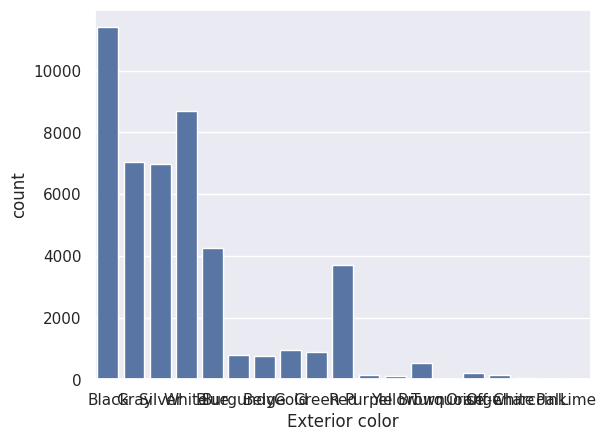

In [ ]:
# Basic, minimal plot example
sns.countplot(x='Exterior color', data=df)

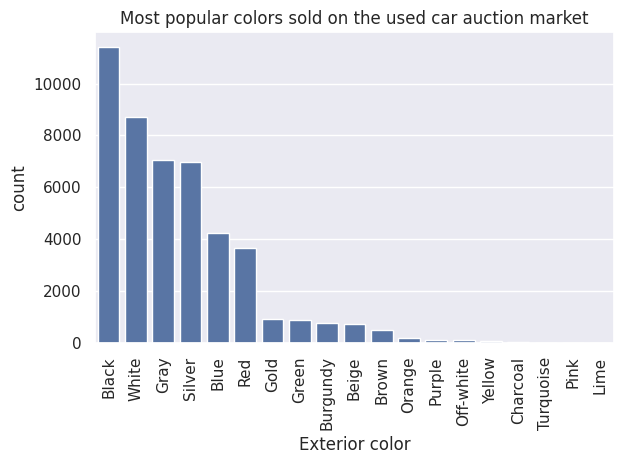

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('Exterior color').size().sort_values(ascending=False)
sns.countplot(x='Exterior color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

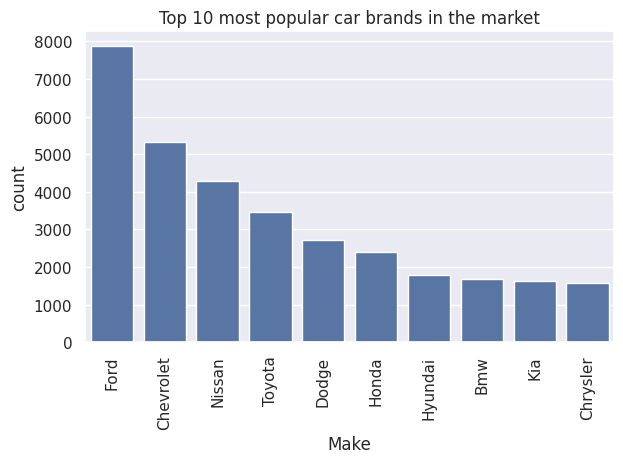

In [ ]:
#Getting a countplot for the top 10 Car brands and sorting them based on popularity (Where a brand is more popular if it has more units sold)
Top_10car_brands = df.groupby('Make').size().sort_values(ascending=False).head(10)#first 10 after sorting
sns.countplot(x='Make', data=df, order=Top_10car_brands.index).set(title='Top 10 most popular car brands in the market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**:

From the countplot, we can deduce that the top 10 most popular car brands in-order of sales are:

1-Ford

2-Chevrolet

3-Nissan

4-Toyota

5-Dodge

6-Honda

7-Hyundai

8-BMW

9-Kia

10-Chrysler

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

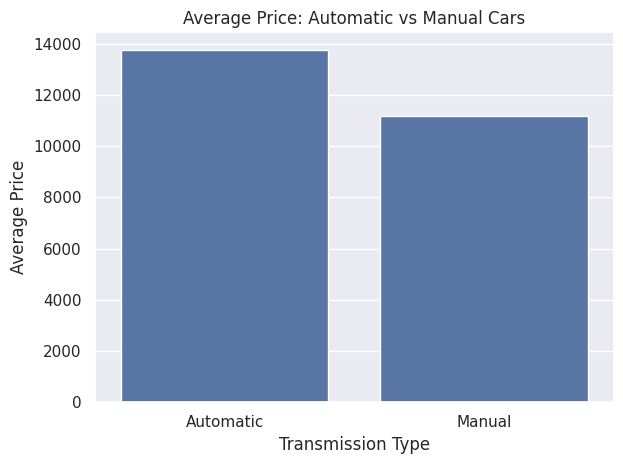

Average price of automatic cars sold 13761

Average price of manual cars sold 11181



In [ ]:
#To answer this question we get the mean price for both automatic and manual cars seperately, then plot the graph shwoing how Automatic mean price compares to Manual

Average_price_by_transmission_type = df.groupby('Transmission')['Selling price ($)'].mean()
sns.barplot(x=Average_price_by_transmission_type.index, y=Average_price_by_transmission_type.values)
plt.title('Average Price: Automatic vs Manual Cars')
plt.ylabel('Average Price')
plt.xlabel('Transmission Type')
plt.tight_layout()
plt.show()

Automatic_mean_price = int(df[df['Transmission'] == 'Automatic']['Selling price ($)'].mean())
print("Average price of automatic cars sold",Automatic_mean_price)
print("")
Manual_mean_price = int(df[df['Transmission'] == 'Manual']['Selling price ($)'].mean())
print("Average price of manual cars sold",Manual_mean_price)
print("")

**Answer for Q2**: Yes, automatic cars sell for higher on average.

The average price of an automatic car is 13761$.

While the average price of a manual car is 11181$

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

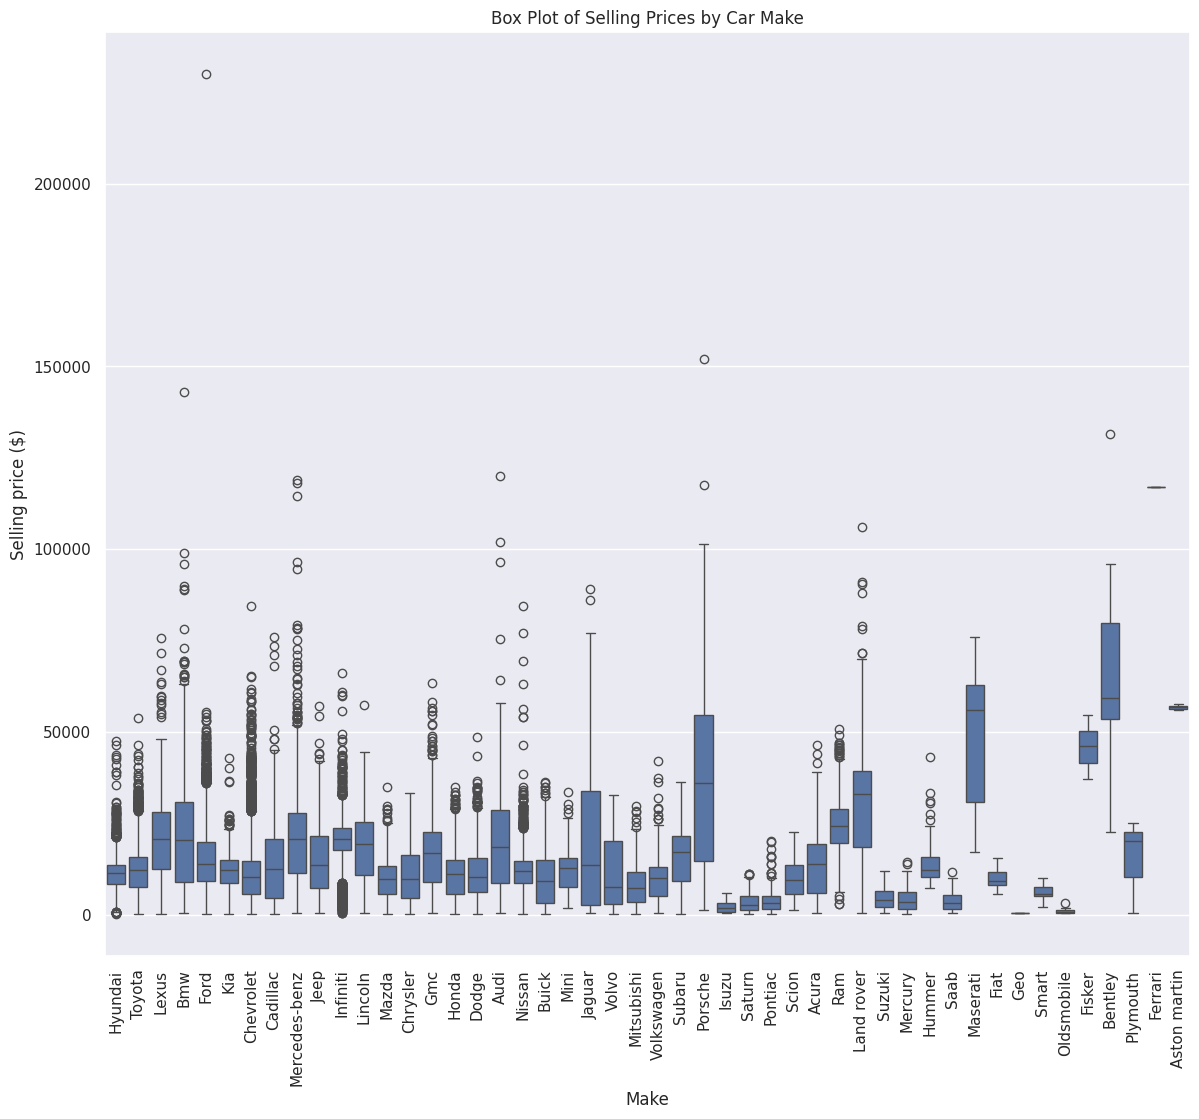

125300.0
79875.0


In [ ]:
plt.figure(figsize=(14, 12))
sns.boxplot(x='Make', y='Selling price ($)', data=df)
plt.title('Box Plot of Selling Prices by Car Make')
plt.xticks(rotation=90)
plt.show()

Jaguar_Q1 = df[df['Make'] == 'Jaguar']['Selling price ($)'].quantile(0.25)
Jaguar_Q3 = df[df['Make'] == 'Jaguar']['Selling price ($)'].quantile(0.75)
Jaguar_IQR = Jaguar_Q3 - Jaguar_Q1
Jaguar_min= Jaguar_Q1 - 1.5 * Jaguar_IQR
Jaguar_max= Jaguar_Q3 + 1.5 * Jaguar_IQR
print(Jaguar_max-Jaguar_min)

Bentley_Q1 = df[df['Make'] == 'Bentley']['Selling price ($)'].quantile(0.25)
Bentley_Q3 = df[df['Make'] == 'Bentley']['Selling price ($)'].quantile(0.75)
Bentley_IQR = Bentley_Q3 - Bentley_Q1
Bentley_min= Bentley_Q1 - 1.5 * Bentley_IQR
Bentley_max= Bentley_Q3 + 1.5 * Bentley_IQR
print(Bentley_Q3)

**Answer for Q3**:

Widest Distribution:

  1) Porsche

  2) Jaguar

Most Expensive:

  1) Ferrari

  2) Porsche

> Add blockquote



**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

Correlation is: 
 Condition            0.529141
Odometer (miles)    -0.580900
Year                 0.581164
Selling price ($)    1.000000
Name: Selling price ($), dtype: float64


Text(0.5, 1.0, 'Scatter Plot of Odometer vs Selling Price')

<Figure size 1000x600 with 0 Axes>

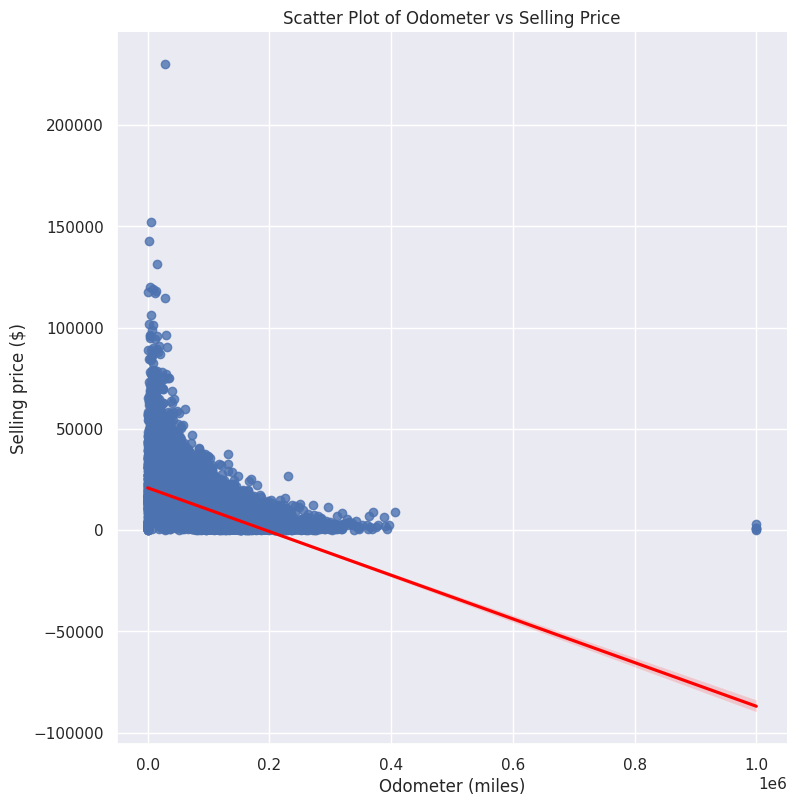

In [ ]:
corr = df.corr(numeric_only=True)
print('Correlation is: \n',corr['Selling price ($)'].sort_values(ascending=True, key=lambda x: x.abs()))
plt.figure(figsize=(10,6))
sns.lmplot(x='Odometer (miles)', y='Selling price ($)', data=df, height=8, fit_reg=False)
sns.regplot(x='Odometer (miles)', y='Selling price ($)', data=df, scatter=False, ax=plt.gca(),color='red')
# plt.xlim(0, 420000)
# plt.ylim(-50000, 160000)
plt.title('Scatter Plot of Odometer vs Selling Price')
#plt.show()

**Answer for Q4**:
From the graph we can say that there is a moderate (-0.58) negative correlation between Odometer and Selling price. As Odometer increases the Price Decreases

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

Correlation is: 
 Condition            0.529141
Odometer (miles)    -0.580900
Year                 0.581164
Selling price ($)    1.000000
Name: Selling price ($), dtype: float64


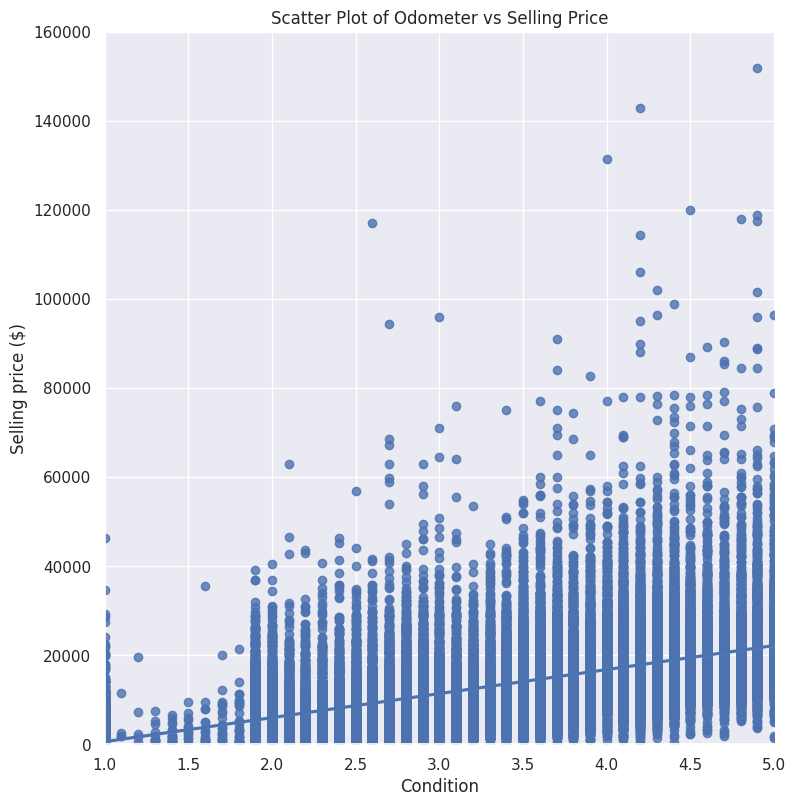

In [ ]:
corr = df.corr(numeric_only=True)
print('Correlation is: \n',corr['Selling price ($)'].sort_values(ascending=True, key=lambda x: x.abs()))
sns.lmplot(x='Condition', y='Selling price ($)', data=df, height=8)
plt.xlim(1, 5)
plt.ylim(0, 160000)
plt.title('Scatter Plot of Odometer vs Selling Price')
plt.show()

**Answer for Q5**: From this graph we can say that there is a moderate (0.53) positive correlation between Selling Price and Condition. As Condition closes to 5 the Price increases

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

<ipython-input-35-3a509a511f26>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Body', y='Selling price ($)', data=avg_body_price, palette='viridis')


Text(0, 0.5, 'Average Price ($)')

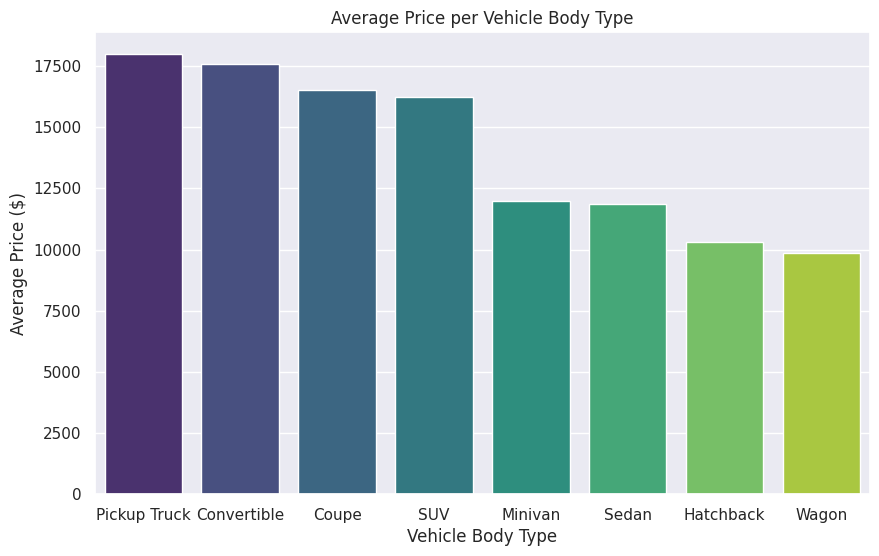

In [ ]:

avg_body_price=df.groupby('Body')['Selling price ($)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Body', y='Selling price ($)', data=avg_body_price, palette='viridis')
plt.title('Average Price per Vehicle Body Type')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Average Price ($)')

**Answer for Q6**:
Yes there is a difference between Avg prices per body

Most Expensive
1.   Pickup Truck
2.   Convertible
3.   Coupe
4.   SUV
5.   Minivan
6.   Sedan
7.   Hatchback
8.   Wagon

Least Expensive

Most Expensive: Pickup Truck

Least Expensive: Wagon







# > Add blockquote



## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
#One hot nominal values since they are important in estimating the price. Keeping in mind drop_First=True to avoid highly correlated variables
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = df.drop(['Vin', 'Saledate', 'Seller','State'], axis=1)

categorical_columns = ['Body', 'Exterior color','Interior color', 'Transmission','Make','Model','Trim']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True,dtype='int8')

df.head(50)

,Year,Condition,Odometer (miles),Selling price ($),Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,...,Trim_sDrive35is,Trim_t Turbo,Trim_x,Trim_xDrive28i,Trim_xDrive30i,Trim_xDrive35d,Trim_xDrive35i,Trim_xDrive35i Premium,Trim_xDrive48i,Trim_xDrive50i
0,2013,3.9,50404.0,10900,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2014,4.6,8386.0,15500,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2007,3.6,100676.0,13600,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2008,4.6,87860.0,14700,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2011,1.7,27819.0,20000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2014,4.9,4046.0,13600,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test split


In [ ]:
#We will be Randomly splitting the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

features = df.columns.drop('Selling price ($)')  # All columns except the target
target = 'Selling price ($)'

# Handle missing data by dropping rows with missing values in selected columns
df = df.dropna(subset=features.tolist() + [target])
x = df.drop('Selling price ($)',axis=1) # Independent variable
y = df['Selling price ($)'] # Dependent variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])


Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
#Here we will apply linear regression to create the model
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
RegModel.fit(x_train, y_train);

#Here we will inspect the parameters of the Theta values
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([RegModel.intercept_] + list(RegModel.coef_))
parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.020351e+06
1,theta_1,Year,1.016071e+03
2,theta_2,Condition,1.281458e+03
3,theta_3,Odometer (miles),-4.405967e-02
4,theta_4,Body_Coupe,-8.982459e+02
...,...,...,...
1827,theta_1827,Trim_xDrive35d,3.018556e+03
1828,theta_1828,Trim_xDrive35i,5.692169e+03
1829,theta_1829,Trim_xDrive35i Premium,5.206562e+03
1830,theta_1830,Trim_xDrive48i,-1.810202e+03


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
y_pred = RegModel.predict(x_test)
rmse=root_mean_squared_error(y_pred, y_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)
R_square = RegModel.score(x_test,y_test)
print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The mean absolute percentage error (MAPE) is:  0.4801042363938454
The median absolute error (MAE) is:  1386.9367319513112
The root mean square error (RMSE) is:  3547.262255226366
R^2 obtained is: 0.8638040082061205


# Model Visualization

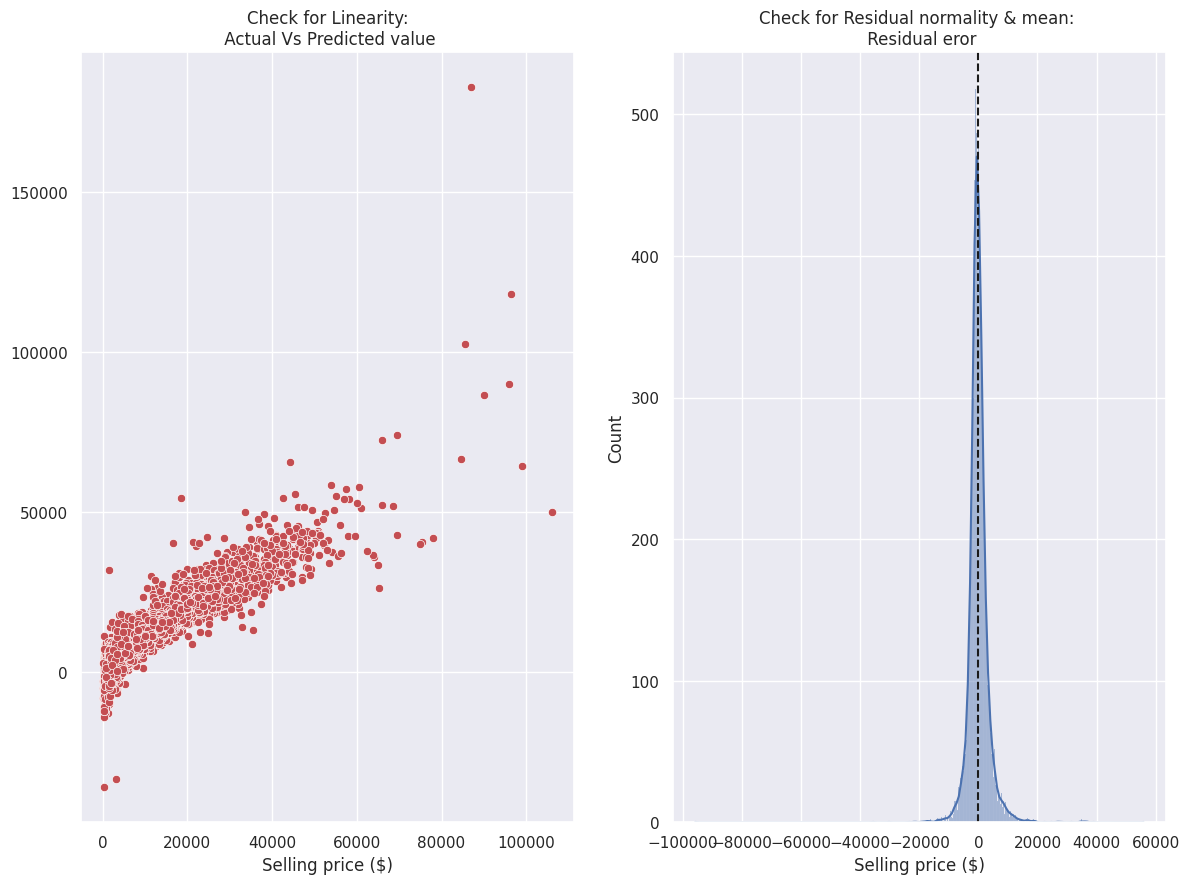

In [ ]:
f = plt.figure(figsize=(14,10))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

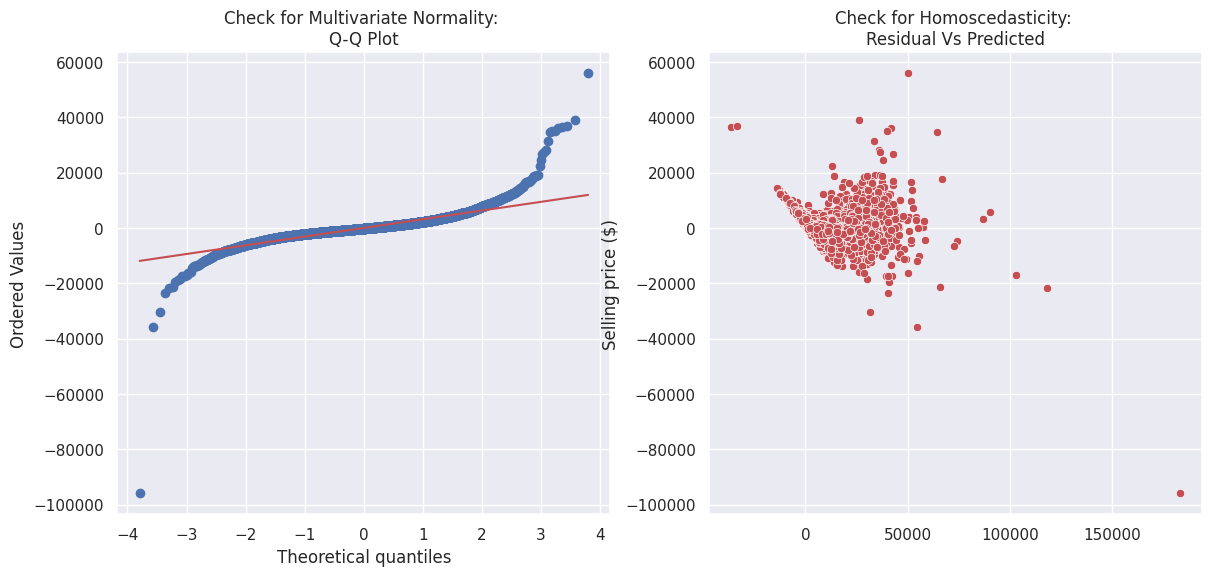

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

# Outliers Handeling

# Data Preparation

In [ ]:
#We will be using the IQR method as it is the most reliable in removing the outliers in this scenario.
Odometer_Q1 = df['Odometer (miles)'].quantile(0.25)
Odometer_Q3 = df['Odometer (miles)'].quantile(0.75)
Odometer_IQR = Odometer_Q3 - Odometer_Q1
Odometer_min= Odometer_Q1 - 1.5 * Odometer_IQR
Odometer_max= Odometer_Q3 + 1.5 * Odometer_IQR
new_df = df[(df['Odometer (miles)'] >= Odometer_min) & (df['Odometer (miles)'] <= Odometer_max)]

Condition_Q1 = new_df['Condition'].quantile(0.25)
Condition_Q3 = new_df['Condition'].quantile(0.75)
Condition_IQR = Condition_Q3 - Condition_Q1
Condition_min= Condition_Q1 - 1.5 * Condition_IQR
Condition_max= Condition_Q3 + 1.5 * Condition_IQR
new_df = new_df[(new_df['Condition'] >= Condition_min) & (new_df['Condition'] <= Condition_max)]

Year_Q1 = new_df['Year'].quantile(0.25)
Year_Q3 = new_df['Year'].quantile(0.75)
Year_IQR = Year_Q3 - Year_Q1
Year_min= Year_Q1 - 1.5 * Year_IQR
Year_max= Year_Q3 + 1.5 * Year_IQR
new_df = new_df[(new_df['Year'] >= Year_min) & (new_df['Year'] <= Year_max)]

Year_Q1 = new_df['Selling price ($)'].quantile(0.25)
Year_Q3 = new_df['Selling price ($)'].quantile(0.75)
Year_IQR = Year_Q3 - Year_Q1
Year_min= Year_Q1 - 1.5 * Year_IQR
Year_max= Year_Q3 + 1.5 * Year_IQR
new_df = new_df[(new_df['Selling price ($)'] >= Year_min) & (new_df['Selling price ($)'] <= Year_max)]
new_df.head()

,Year,Condition,Odometer (miles),Selling price ($),Body_Coupe,Body_Hatchback,Body_Minivan,Body_Pickup Truck,Body_SUV,Body_Sedan,...,Trim_sDrive35is,Trim_t Turbo,Trim_x,Trim_xDrive28i,Trim_xDrive30i,Trim_xDrive35d,Trim_xDrive35i,Trim_xDrive35i Premium,Trim_xDrive48i,Trim_xDrive50i
0,2013,3.9,50404.0,10900,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [ ]:
#We will be Randomly splitting the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

features = new_df.columns.drop('Selling price ($)')  # All columns except the target
target = 'Selling price ($)'

# Handle missing data by dropping rows with missing values in selected columns
new_df = new_df.dropna(subset=features.tolist() + [target])
x = new_df.drop('Selling price ($)',axis=1) # Independent variable
y = new_df['Selling price ($)'] # Dependent variable
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])


Training dataset size: 34794
Testing dataset size: 8699


# Modeling

In [ ]:
#Here we will apply linear regression to create the model
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
RegModel.fit(x_train, y_train);

#Here we will inspect the parameters of the Theta values
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([RegModel.intercept_] + list(RegModel.coef_))
parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-1.945178e+06
1,theta_1,Year,9.763674e+02
2,theta_2,Condition,1.143162e+03
3,theta_3,Odometer (miles),-4.953397e-02
4,theta_4,Body_Coupe,-6.874826e+02
...,...,...,...
1827,theta_1827,Trim_xDrive35d,6.069830e+03
1828,theta_1828,Trim_xDrive35i,3.839966e+03
1829,theta_1829,Trim_xDrive35i Premium,6.910386e+03
1830,theta_1830,Trim_xDrive48i,1.895365e+03


# Model Evaluation and Validation

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
y_pred = RegModel.predict(x_test)
rmse=root_mean_squared_error(y_pred, y_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)
R_square = RegModel.score(x_test,y_test)
print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The mean absolute percentage error (MAPE) is:  0.2958101627846374
The median absolute error (MAE) is:  1214.7619676606264
The root mean square error (RMSE) is:  2376.8201337405208
R^2 obtained is: 0.8993818683991098


# Model Visualization

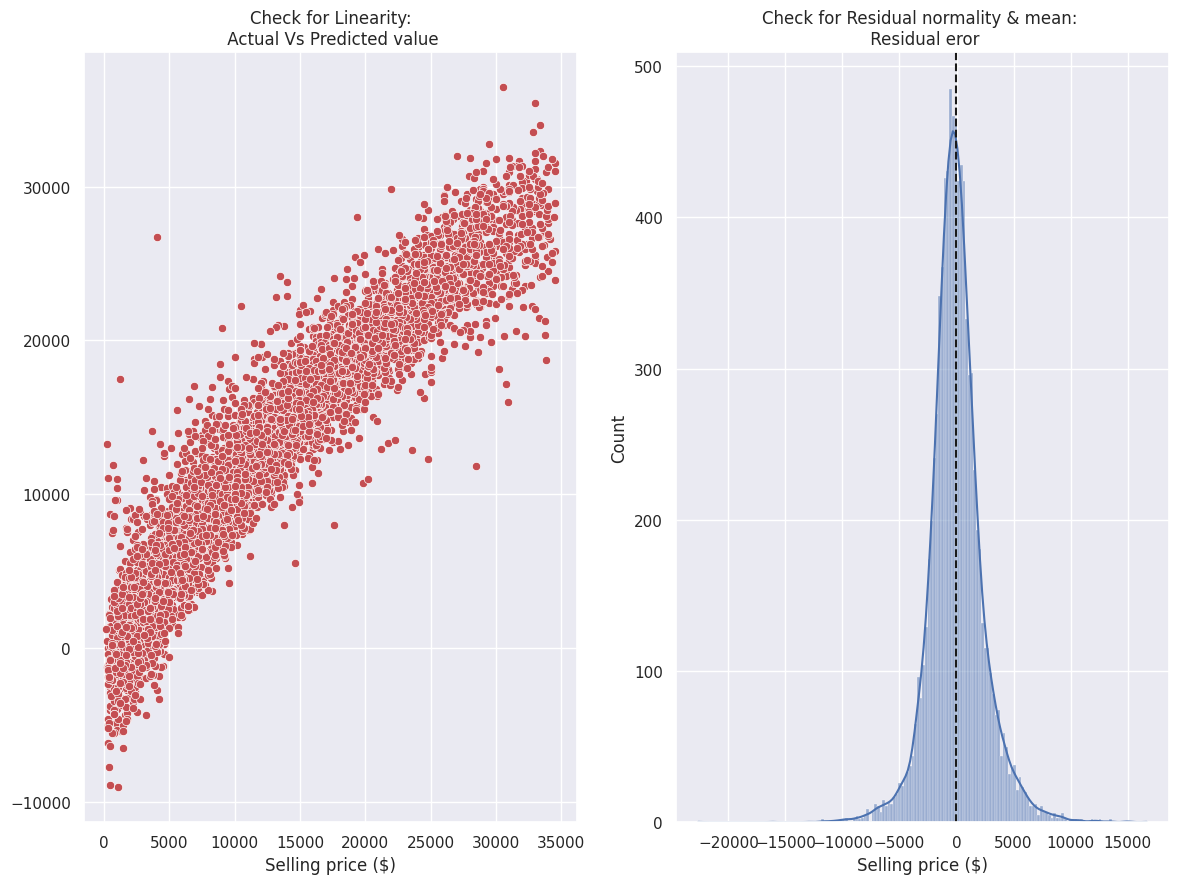

In [ ]:
f = plt.figure(figsize=(14,10))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

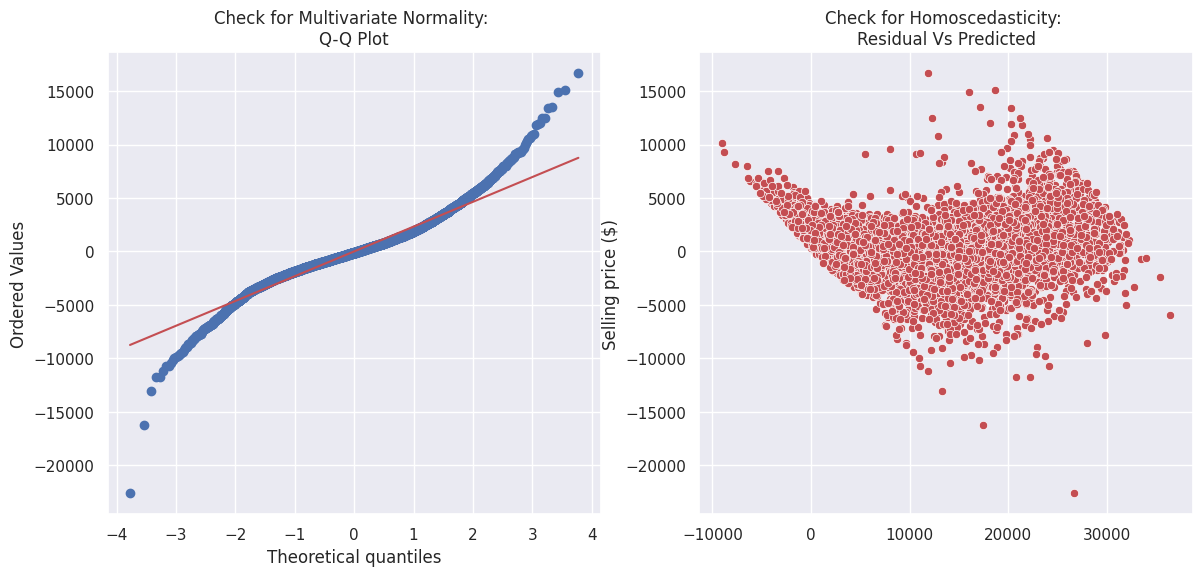

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:

Conclusion of the Model before Handeling Outliers:

1) Mean Absolute Percentage Error (MAPE): 0.48

  -)This indicates that, on average, the model's predictions are off by about 48.0% compared to the actual selling prices. It shows how close the predicted prices are to the actual auction prices. Therefore, the lower the value, the closer the predicted values are to the actual values. Hence, a value of 0.48 is a quite high accuracy value rate.

2) Median Absolute Error (MAE): 1387

-) The MAE of 1387 means that the median of the absolute errors between predicted prices and actual selling prices is about $1,387 it highlights how far off the model's predictions are from the actual prices.

3) Root Mean Square Error (RMSE): 3547

-) The RMSE of 3547 indicates that the standard deviation of the prediction errors is about $3,547 RMSE is sensitive to outliers, so a high RMSE might indicate that some car prices were predicted poorly, especially in the presence of more expensive or unique vehicles. This measure shows how far the predictions deviate from actual values, highlighting areas where the model might struggle.

4) R² Value: 0.8638

The R² value of approximately 0.8638 indicates that around 86.38% of the variance in the car selling prices can be explained by the features in the model (like year, make, model, trim, body type, etc.). This suggests a strong correlation between the predictor variables and the selling price. An R² value close to 1 indicates a good fit, meaning the model captures a substantial amount of the price variation based on the car attributes.

In summary, while the model shows strong predictive capabilities (as indicated by a high R²), the MAPE, MAE, and RMSE suggest there are still significant errors in price estimation, particularly with individual predictions. This variability can be due to the inherent complexity of car pricing, influenced by multiple factors beyond what is captured in the dataset (like market trends, demand fluctuations, or car-specific features). This model would work great for general insights or trends but falls short for detailed financial decisions.



# Conclusion After removing Outliers

After removing the outliers, the model's performance improved significantly, as evidenced by the decrease in the mean absolute percentage error (MAPE) from 48% to 29.6%, indicating a much higher accuracy in predictions. The median absolute error (MAE) also decreased to $1214.80, while    

the root mean square error (RMSE) improved to $2376.8, reflecting closer alignment of predictions to actual seelling prices. The R2 value improved from 0.8638 to 0.899, indicating that the model explains a higher proportion of the variance in selling prices. Overall, the removal of outliers has resulted in a more reliable model for estimating car prices, enhancing its predictive capability.

